<h1 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:250%;text-align:center;border-radius: 15px 50px;">Analyzing the effect of stress on students</h1>

# Table of content 

* [1. Introduction](#1)
* [2. Data and Libraries](#2)
* [3. The characteristics of students reporting negative experiences](#3)
* [4. Psychological Factors](#4)
* [5. Physiological Factors](#5)
* [6. Environmental Factors](#6)
* [7. Academic Factors](#7)
* [8. Social Factors](#8)
* [9. Comparative Analysis](#9)
* [10. General Exploration](#10)
* [11. Correlation Heatmap of Key Factors](#11)
* [12. Determining Specific Feature Impact](#12)

<a id="1"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Introduction</h3>

In the dynamic landscape of modern education, the well-being of students has become an increasingly pivotal concern. As educational institutions strive to nurture holistic development, the recognition and mitigation of stress factors affecting students have gained prominence. The project endeavors to delve into the intricate web of student stressors through a meticulous and comprehensive statistical analysis.

The journey through academia is multifaceted, encompassing academic challenges, social dynamics, extracurricular commitments, and personal growth. Understanding the complex interplay of these factors is essential for creating supportive environments that foster both academic success and mental well-being. This project aims to identify, quantify, and analyze the various stressors influencing students across diverse educational settings.

<a id="2"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Data and Libraries</h3>

In [2]:
df = pd.read_csv(r"C:\Users\moude\Desktop\Projetcs-data science\GitHub\student-stress-factors\StressLevelDataset.csv")

In [4]:
df.head(10)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,1,2,4,3,3,...,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter

<a id="3"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">The characteristics of students reporting negative experiences</h3>

In [3]:
num_students = len(df)

average_anxiety_level = df['anxiety_level'].mean()

students_with_mental_health_history = df[df['mental_health_history'] == 1]
num_students_with_mental_health_history = len(students_with_mental_health_history)

print("1) Number of students in the dataset:", num_students)
print("2) Average anxiety level of students:", average_anxiety_level)
print("3) Number of students with a history of mental health issues:", num_students_with_mental_health_history)

1) Number of students in the dataset: 1100
2) Average anxiety level of students: 11.063636363636364
3) Number of students with a history of mental health issues: 542


In [36]:
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

num_students_with_negative_psychological = df[psychological_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_physiological = df[physiological_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_environmental = df[environmental_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_academic = df[academic_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_social = df[social_factors].apply(lambda x: x.gt(3).sum(), axis=1)

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [
    num_students_with_negative_psychological.sum(),
    num_students_with_negative_physiological.sum(),
    num_students_with_negative_environmental.sum(),
    num_students_with_negative_academic.sum(),
    num_students_with_negative_social.sum()
]

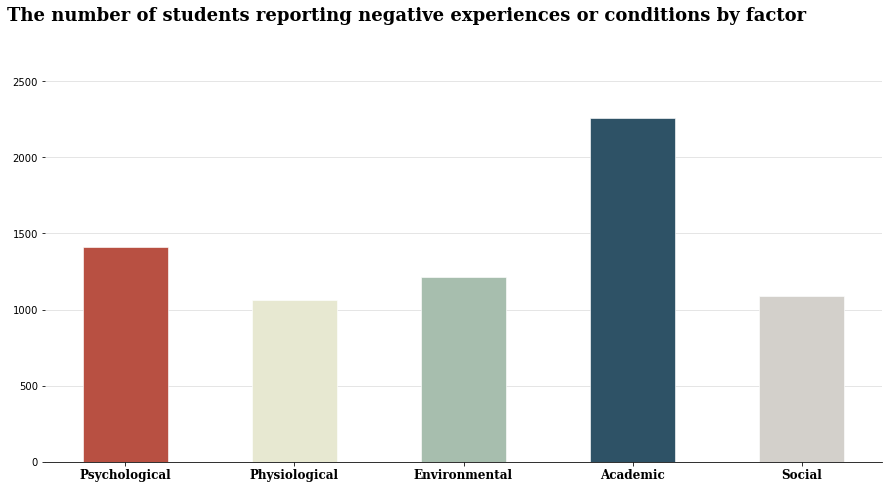

In [37]:
color_map = ['#B85042', '#E7E8D1', '#A7BEAE', '#2E5266FF', '#D3D0CBFF']


fig, ax = plt.subplots(1,1, figsize=(15, 7))
ax.bar(x=factors, height=negative_experiences, width=0.5, 
       edgecolor='white',
       linewidth=0.6,color=color_map)


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_major_locator(FixedLocator(range(len(factors))))
ax.set_xticklabels(factors, fontfamily='serif', rotation=0, fontweight = 'bold', fontsize = 12)

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 3000, 500) 
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

fig.text(0.09, 1, 'The number of students reporting negative experiences or conditions by factor', fontsize=18, fontweight='bold', fontfamily='serif')

plt.show()

<a id="4"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Psychological Factors</h3>

In [38]:

average_self_esteem = df['self_esteem'].mean()
students_below_average_self_esteem = df[df['self_esteem'] < average_self_esteem]
num_students_below_average_self_esteem = len(students_below_average_self_esteem)


percentage_students_experiencing_depression = (df['depression'].sum() / num_students) * 100

print("1) Number of students with self-esteem below the average:", num_students_below_average_self_esteem)
print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

1) Number of students with self-esteem below the average: 507
2) Percentage of students experiencing depression: 1255.55%


In [39]:
# Define the threshold and create the new binary column
threshold = 10
df['depression_binary'] = (df['depression'] > threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)


percentage_students_experiencing_depression = (df['depression_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

2) Percentage of students experiencing depression: 56.36%


<a id="5"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Physiological Factors</h3>

In [40]:
students_with_frequent_headaches = df[df['headache'] == 1]
num_students_with_frequent_headaches = len(students_with_frequent_headaches)

average_blood_pressure = df['blood_pressure'].mean()

students_with_poor_sleep_quality = df[df['sleep_quality'] < 3]
num_students_with_poor_sleep_quality = len(students_with_poor_sleep_quality)

print("1) Number of students experiencing frequent headaches:", num_students_with_frequent_headaches)
print("2) Average blood pressure reading among the students:", average_blood_pressure)
print("3) Number of students with poor sleep quality:", num_students_with_poor_sleep_quality)

1) Number of students experiencing frequent headaches: 331
2) Average blood pressure reading among the students: 2.1818181818181817
3) Number of students with poor sleep quality: 550


<a id="6"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Environmental Factors</h3>

In [41]:
students_in_high_noise_conditions = df[df['noise_level'] > 3]
num_students_in_high_noise_conditions = len(students_in_high_noise_conditions)

percentage_students_feeling_unsafe = (df['safety'].sum() / num_students) * 100

students_without_basic_needs = df[df['basic_needs'] == 0]
num_students_without_basic_needs = len(students_without_basic_needs)

print("1) Number of students living in high noise conditions:", num_students_in_high_noise_conditions)
print("2) Percentage of students feeling unsafe in their living conditions:", percentage_students_feeling_unsafe)
print("3) Number of students without their basic needs met:", num_students_without_basic_needs)

1) Number of students living in high noise conditions: 274
2) Percentage of students feeling unsafe in their living conditions: 273.72727272727275
3) Number of students without their basic needs met: 40


In [42]:
threshold_for_safety = 2
df['feeling_unsafe'] = (df['safety'] <= threshold_for_safety).astype(int)


percentage_students_feeling_unsafe = (df['feeling_unsafe'].sum() / num_students) * 100

print(f"2) Percentage of students feeling unsafe in their living conditions: {percentage_students_feeling_unsafe:.2f}%")

2) Percentage of students feeling unsafe in their living conditions: 51.36%


<a id="7"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Academic Factors</h3>

In [43]:
students_below_average_academic_performance = df[df['academic_performance'] < 3]
num_students_below_average_academic_performance = len(students_below_average_academic_performance)

average_study_load = df['study_load'].mean()

students_with_future_career_concerns = df[df['future_career_concerns'] == 1]
num_students_with_future_career_concerns = len(students_with_future_career_concerns)

print("1) Number of students with below-average academic performance:", num_students_below_average_academic_performance)
print("2) Average study load reported by students:", average_study_load)
print("3) Number of students with concerns about their future careers:", num_students_with_future_career_concerns)

1) Number of students with below-average academic performance: 561
2) Average study load reported by students: 2.6218181818181816
3) Number of students with concerns about their future careers: 327


<a id="8"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Social Factors</h3>

In [44]:
students_with_strong_social_support = df[df['social_support'] > 3]
num_students_with_strong_social_support = len(students_with_strong_social_support)

percentage_students_experiencing_bullying = (df['bullying'].sum() / num_students) * 100

students_participating_in_extracurricular = df[df['extracurricular_activities'] == 1]
num_students_participating_in_extracurricular = len(students_participating_in_extracurricular)

print("1) Number of students with strong social support:", num_students_with_strong_social_support)
print("2) Percentage of students experiencing bullying:", percentage_students_experiencing_bullying)
print("3) Number of students participating in extracurricular activities:", num_students_participating_in_extracurricular)

1) Number of students with strong social support: 0
2) Percentage of students experiencing bullying: 261.72727272727275
3) Number of students participating in extracurricular activities: 184


In [45]:
bullying_threshold = 3
df['bullying_binary'] = (df['bullying'] > bullying_threshold).astype(int)

if 'num_students' not in locals():
    num_students = len(df)

percentage_students_experiencing_bullying = (df['bullying_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing bullying: {percentage_students_experiencing_bullying:.2f}%")

2) Percentage of students experiencing bullying: 32.73%


<a id="9"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Comparative Analysis</h3>

In [46]:
correlation_anxiety_academic = df['anxiety_level'].corr(df['academic_performance'])

correlation_sleep_depression = df['sleep_quality'].corr(df['depression'])

students_with_bullying_history = df[df['bullying'] == 1]
students_with_bullying_history_and_mental_health_history = students_with_bullying_history[
    students_with_bullying_history['mental_health_history'] == 1]
percentage_students_with_bullying_and_mental_health_history = (
    len(students_with_bullying_history_and_mental_health_history) / len(students_with_bullying_history)) * 100

print("1) Correlation between anxiety level and academic performance:", correlation_anxiety_academic)
print("2) Correlation between sleep quality and depression:", correlation_sleep_depression)
print("3) Percentage of students with bullying history and mental health history:", percentage_students_with_bullying_and_mental_health_history)

1) Correlation between anxiety level and academic performance: -0.649601129614508
2) Correlation between sleep quality and depression: -0.6931609071393342
3) Percentage of students with bullying history and mental health history: 4.179104477611941


<a id="10"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">General Exploration</h3>

- 1) Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?
- 2) Are there any noticeable trends or patterns when comparing different factors?
- 3) Which specific feature within each factor has the most significant impact on student stress, based on the dataset?

In [47]:
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [num_students_below_average_self_esteem, 
                        num_students_with_frequent_headaches, 
                        num_students_in_high_noise_conditions, 
                        num_students_without_basic_needs, 
                        len(students_with_bullying_history)]
factor_with_most_negatives = factors[negative_experiences.index(max(negative_experiences))]

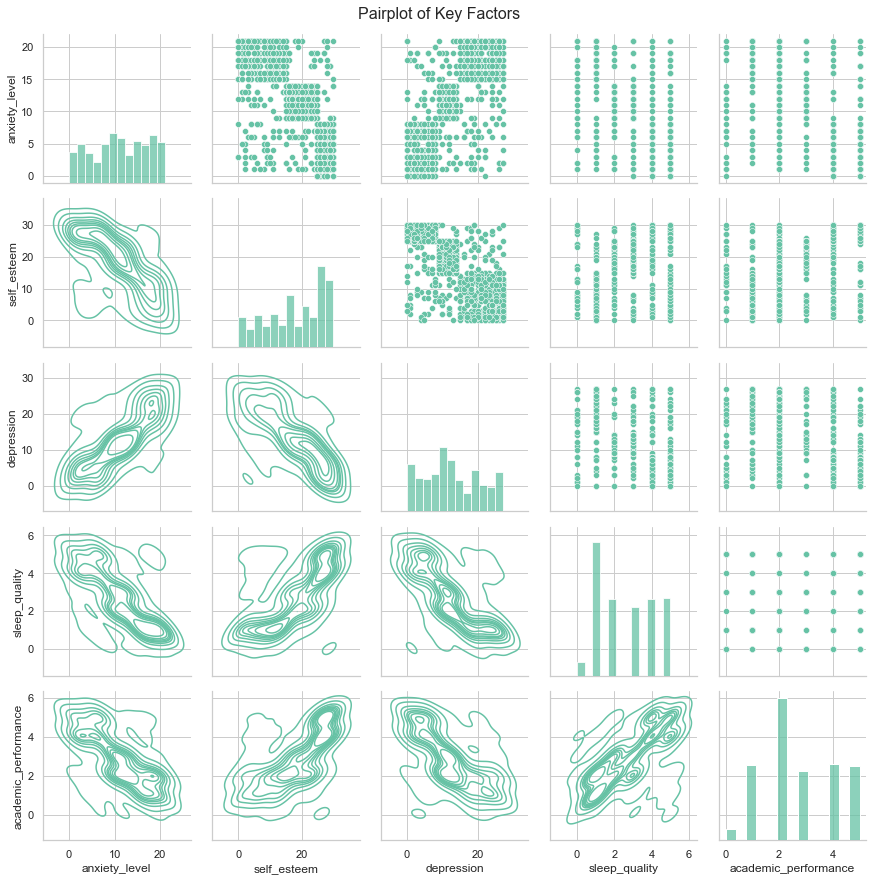

Factor: Psychological
- Feature: anxiety_level, Importance: 0.2489165420734438
- Feature: self_esteem, Importance: 0.5343582677501916
- Feature: mental_health_history, Importance: 0.022567793019166654
- Feature: depression, Importance: 0.19415739715719788

Factor: Physiological
- Feature: headache, Importance: 0.4301284765684731
- Feature: blood_pressure, Importance: 0.05177619156102662
- Feature: sleep_quality, Importance: 0.446931403631823
- Feature: breathing_problem, Importance: 0.07116392823867732

Factor: Environmental
- Feature: noise_level, Importance: 0.1530957680577916
- Feature: living_conditions, Importance: 0.11981263510188093
- Feature: safety, Importance: 0.3354673726957418
- Feature: basic_needs, Importance: 0.39162422414458575

Factor: Academic
- Feature: academic_performance, Importance: 0.4025704377151674
- Feature: study_load, Importance: 0.10374512454435172
- Feature: teacher_student_relationship, Importance: 0.26200128651943555
- Feature: future_career_concerns, I

In [49]:
sns.set(style="whitegrid", palette="Set2")


factors_to_plot = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']]

g = sns.PairGrid(factors_to_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.histplot, kde_kws={'color': 'C0'})


plt.subplots_adjust(top=0.95)
g.fig.suptitle("Pairplot of Key Factors", size=16)

plt.show()


from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']


psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

model = RandomForestRegressor()


feature_importance = {}

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = df[features]
    y = df['stress_level']

    model.fit(X, y)

    importance = model.feature_importances_
    
    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

<a id="11"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Correlation Heatmap of Key Factors</h3>

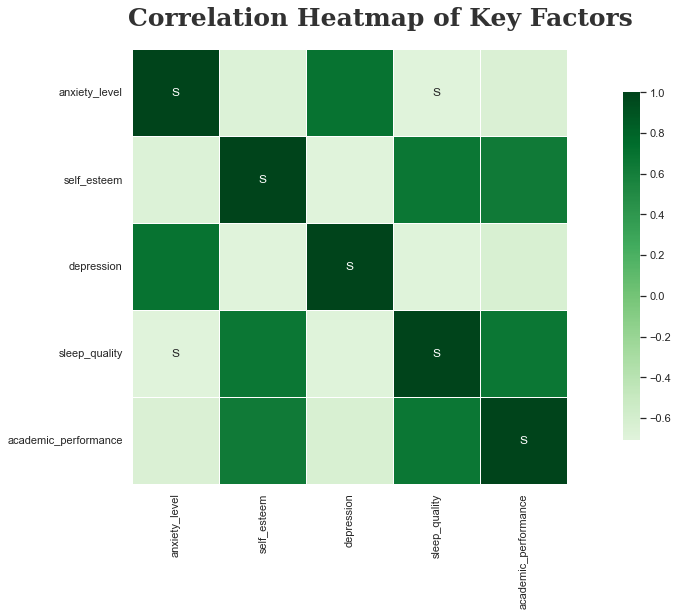

In [58]:
correlation_matrix = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']].corr()
labels = np.where(np.abs(correlation_matrix)>0.70, "S", "")

fig = plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap='Greens', cbar_kws={"shrink": 0.8});

fig.text(0.44,0.92,"Correlation Heatmap of Key Factors", fontfamily='serif',fontsize=25, fontweight='bold', color='#323232')

plt.show()

<a id="12"></a>
<h3 style="background-color:#2BAE66FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Determining Specific Feature Impact</h3>

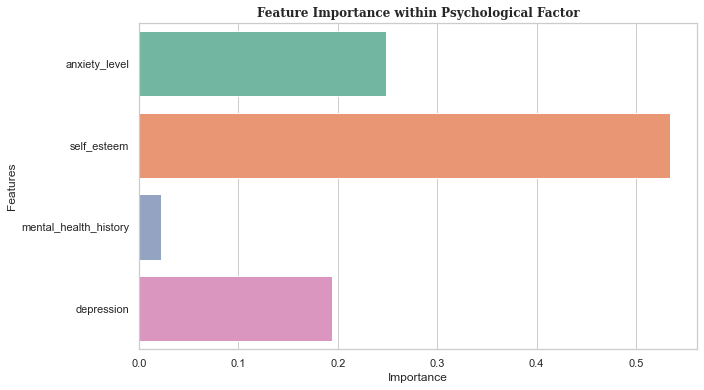

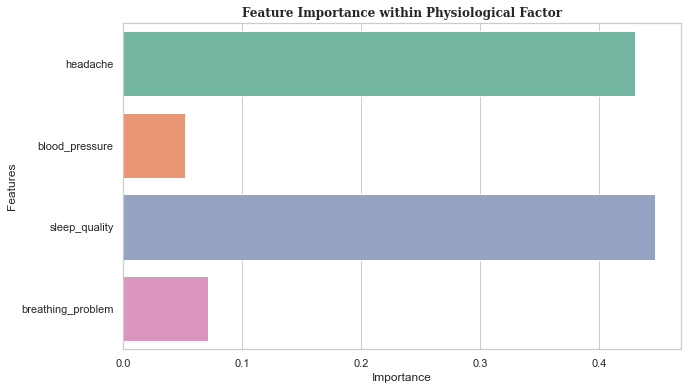

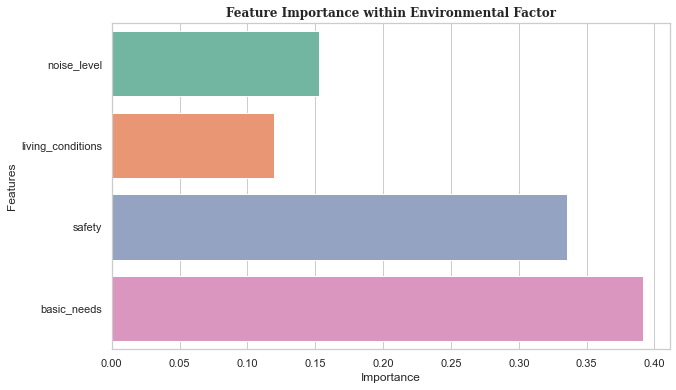

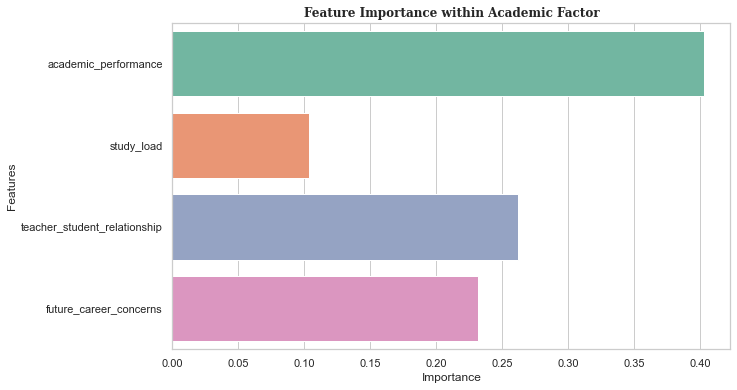

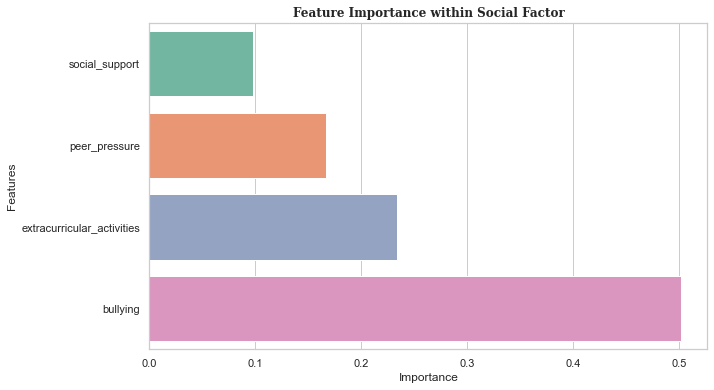

In [62]:
# Define feature importance for each factor

psychological_feature_importance = feature_importance['Psychological']
physiological_feature_importance = feature_importance['Physiological']
environmental_feature_importance = feature_importance['Environmental']
academic_feature_importance = feature_importance['Academic']
social_feature_importance = feature_importance['Social']



# Create bar charts for feature importance within each factor

def plot_feature_importance(factor_name, importance_dict):
    features = list(importance_dict.keys())
    importance = list(importance_dict.values())
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=features, orient='h')
    
    plt.title(f"Feature Importance within {factor_name} Factor", fontweight = 'bold', fontfamily='serif',fontsize = 12)
    
    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)
        
    ax.yaxis.set_major_locator(FixedLocator(range(len(features))))
    ax.set_yticklabels(features, fontfamily='serif', rotation=0, fontweight = 'bold', fontsize = 12)
    
    ax.grid(axis='x', linestyle='-', alpha=0.4)   
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance('Psychological', psychological_feature_importance)
plot_feature_importance('Physiological', physiological_feature_importance)
plot_feature_importance('Environmental', environmental_feature_importance)
plot_feature_importance('Academic', academic_feature_importance)
plot_feature_importance('Social', social_feature_importance)